In [1]:
%pip install yfinance statsmodels tensorflow keras seaborn

In [2]:
import yfinance as yf
import pandas as pd

data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
data = data[['Close']]
data.dropna(inplace=True)

/tmp/ipython-input-2-1160435528.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


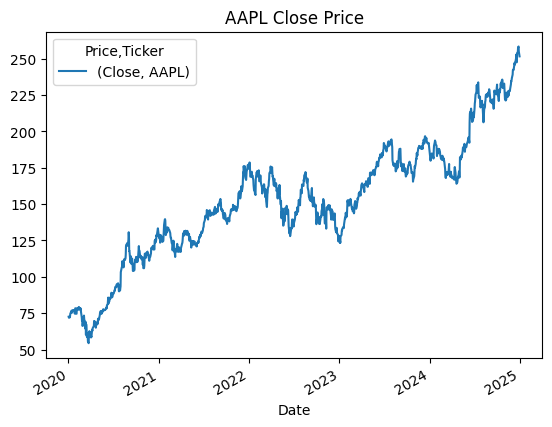

ADF Statistic: -0.6613744098827556
p-value: 0.8565024192942671


In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

data.plot(title='AAPL Close Price')
plt.show()

result = adfuller(data['Close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

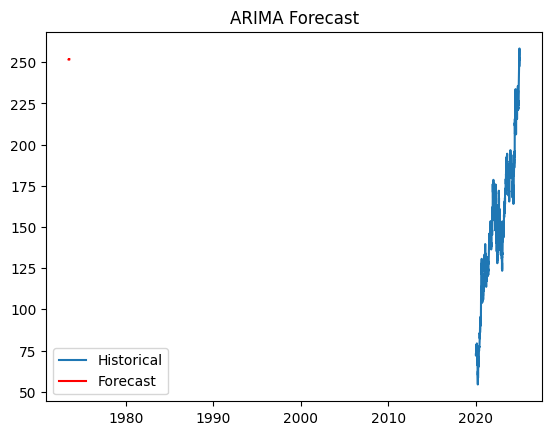

In [4]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

model = ARIMA(data['Close'], order=(5, 1, 0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)

plt.plot(data['Close'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0940
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0024
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 9.3650e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 9.5612e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 9.2665e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - loss: 9.0776e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 7.6726e-04
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 7.9190e-04
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 7.1914e-04
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 7.5208e-04


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


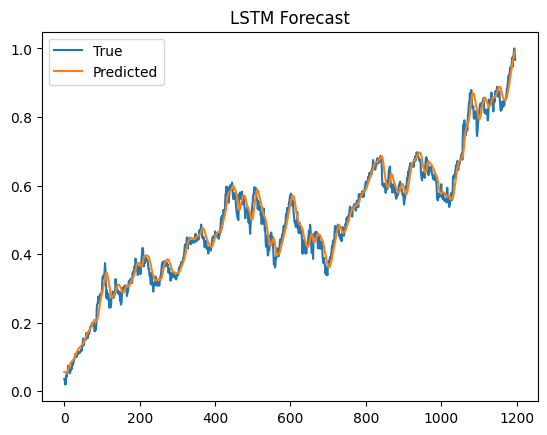

In [8]:
import matplotlib.pyplot as plt

predicted = model.predict(X)

plt.plot(y, label='True')
plt.plot(predicted, label='Predicted')
plt.legend()
plt.title("LSTM Forecast")
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("ARIMA RMSE:", np.sqrt(mean_squared_error(data['Close'][-30:], forecast)))
print("LSTM RMSE:", np.sqrt(mean_squared_error(y, predicted)))

ARIMA RMSE: 13.626004936192032
LSTM RMSE: 0.026569186750564768
